# Real Estate Price Prediction

In [1]:
import pandas as pd
housing_data=pd.read_csv("housing_dataset.csv")
housing_data.head() #displays the first 5 rows(by default) with data of the given dataset
housing_data.info() #provides details of the given dataset
housing_data.describe() #provides multiple details about each feature such as mean,max,standard deviation etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [2]:
import matplotlib.pyplot as plt
housing_data.hist(bins=45,figsize=(20,20))#histogram of the features with data

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

##Train-Test-Splitting of Dataset

In [3]:
import numpy as np
def stt(data,test_ratio):
    shuffle_data=np.random.permutation(len(data))
    np.random.seed(45)
    test_set_size=int(len(data)*test_ratio) #size of test dataset
    test_indices=shuffle_data[:test_set_size] #test dataset
    train_indices=shuffle_data[test_set_size:] #train dataset
    return data.iloc[train_indices],data.iloc[test_indices]

In [4]:
train_set , test_set=stt(housing_data,0.15)
print(f"Rows in Train Dataset :{len(train_set)} \nRows in Test Dataset :{len(test_set)}")

Rows in Train Dataset :431 
Rows in Test Dataset :75


In [5]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing_data, test_size=0.15,random_state=45)
print(f"Rows in Train Dataset :{len(train_set)} \nRows in Test Dataset :{len(test_set)}")

Rows in Train Dataset :430 
Rows in Test Dataset :76


SPLITTING OF FEATURE 'CHAS' OF THE GIVEN HOUSING DATASET 

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=45)
for train_index,test_index in split.split(housing_data,housing_data['CHAS']):
    stratified_trainset=housing_data.loc[train_index]
    stratified_testset=housing_data.loc[test_index]
#stratified_testset

In [7]:
stratified_trainset['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [8]:
stratified_testset['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [9]:
housing=stratified_trainset.copy()

##Finding Correlations

In [10]:
correlation_matrix=housing_data.corr() 
correlation_matrix['MEDV'].sort_values(ascending=False) ## Pearson Correlation :: gives respective Coefficients for each fearure

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='TAX'>,
        <AxesSubplot:xlabel='RM', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='TAX'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='TAX', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

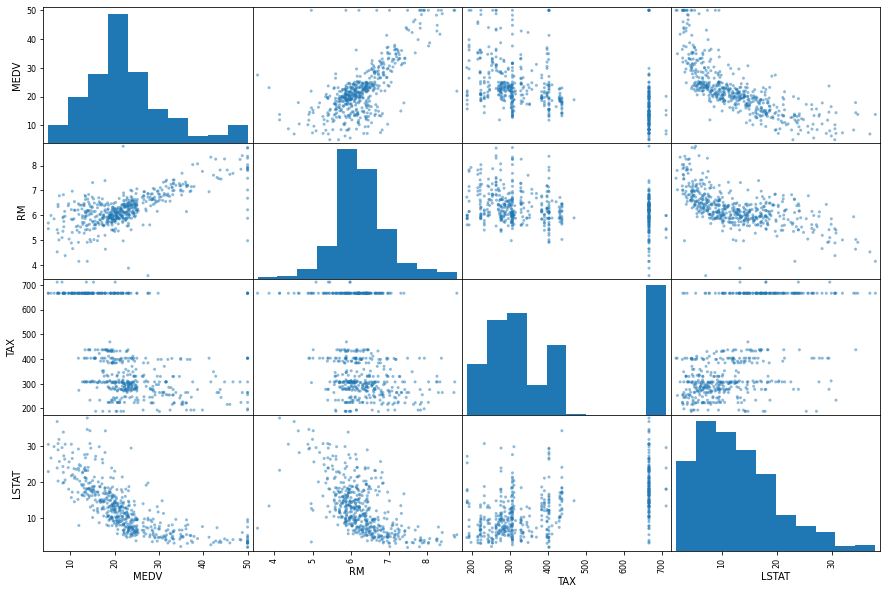

In [11]:
from pandas.plotting import scatter_matrix
attr=["MEDV","RM","TAX","LSTAT"]
scatter_matrix(housing_data[attr],figsize=(15,10))

# #Testing different Attribute combinations

In [12]:
housing_data["TAXRM"]=housing_data["TAX"]/housing_data['RM']
housing_data['TAXRM']
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

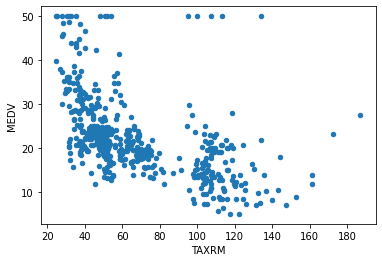

In [13]:
housing_data.plot(kind="scatter", x="TAXRM",y="MEDV",alpha=1)

In [14]:
housing=stratified_trainset.drop("MEDV",axis=1)
housing_labels=stratified_trainset["MEDV"].copy()

# Taking care of missing attributes


In [15]:
# possible options:-
#     A.remove all the data from all the features corresponding to the missing datapoints.
#     B.remove the particular feature as a whole
#     C.set the missing values to some value(0 or mean or median).

In [16]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="median")
imp.fit(housing)
imp.statistics_

array([2.6888e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1930e+00, 7.9500e+01, 3.0793e+00, 5.0000e+00, 3.3600e+02,
       1.9100e+01, 3.9134e+02, 1.1360e+01])

In [17]:
_x=imp.transform(housing)
#_x.info()

In [18]:
housing_transform=pd.DataFrame(_x,columns=housing.columns)
housing_transform.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.716923,11.110149,11.384777,0.069307,0.557979,6.252616,69.275990,3.754698,9.826733,415.282178,18.473020,360.439480,12.701312
std,8.455136,22.833976,6.930255,0.254290,0.117396,0.693465,28.280361,2.156837,8.839887,170.538323,2.150016,86.011519,7.105235
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083545,0.000000,5.190000,0.000000,0.449000,5.875750,44.850000,2.009600,4.000000,284.000000,17.000000,375.472500,6.990000
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.193000,79.500000,3.079300,5.000000,336.000000,19.100000,391.340000,11.360000
75%,3.896877,12.500000,18.100000,0.000000,0.631000,6.582500,94.725000,5.117025,24.000000,666.000000,20.200000,396.250000,17.092500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Creating a Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])

In [20]:
housing_num_trans=my_pipeline.fit_transform(housing)
housing_num_trans.shape


(404, 13)

# Chosing a desired model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model1=LinearRegression ()
model2=DecisionTreeRegressor()
model1.fit(housing_num_trans,housing_labels)
model2.fit(housing_num_trans,housing_labels)
model3=RandomForestRegressor()
model3.fit(housing_num_trans,housing_labels)

RandomForestRegressor()

In [22]:
data=housing.iloc[:6]
labels=housing_labels.iloc[:6]

In [23]:
prepared_data=my_pipeline.transform(data)
print("\nPrediction from Linear Regression Model :", model1.predict(prepared_data))
print("\nPrediction from DT_Regressor Model :", model2.predict(prepared_data))
print("\nPrediction from RF_Regressor Model :", model3.predict(prepared_data))


Prediction from Linear Regression Model : [32.15898264 37.28020686 31.683784   20.69234435 20.01285076 20.64100185]

Prediction from DT_Regressor Model : [30.3 37.6 27.9 21.  24.3 21.7]

Prediction from RF_Regressor Model : [31.402 40.758 27.849 21.981 23.733 21.428]


In [24]:
list(labels)

[30.3, 37.6, 27.9, 21.0, 24.3, 21.7]

# Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error
pred_housing=model1.predict(housing_num_trans) #evaluating mean squared errors of the predicted values
mse1=mean_squared_error(housing_labels,pred_housing)
rmse1=np.sqrt(mse1) #root of mean squared error

print("\nMean squared error : ",mse1)
print("\nRoot Mean squared error : ", rmse1)


Mean squared error :  22.529553322197774

Root Mean squared error :  4.746530661672563


In [27]:
pred_housing2=model2.predict(housing_num_trans)
mse2=mean_squared_error(housing_labels,pred_housing2)
rmse2=np.sqrt(mse2)

In [28]:
print("\nMean squared error for Decision Tree Regressor : ",mse2)
print("\nRoot Mean squared error for Decision Tree Regressor: ", rmse2)
##case of overfitting hence no error


Mean squared error for Decision Tree Regressor :  0.0

Root Mean squared error for Decision Tree Regressor:  0.0


In [29]:
pred_housing3=model3.predict(housing_num_trans)
mse3=mean_squared_error(housing_labels,pred_housing3)
rmse3=np.sqrt(mse3)

print("\nMean squared error for RandomForest Regressor : ",mse3)
print("\nRoot Mean squared error for RandomForest Tree Regressor: ", rmse3)


Mean squared error for RandomForest Regressor :  1.7207162004950505

Root Mean squared error for RandomForest Tree Regressor:  1.3117607253211427


# Using Cross Validation Technique

In [61]:
from sklearn.model_selection import cross_val_score
new_data2=cross_val_score(model2,housing_num_trans,housing_labels,scoring="neg_mean_squared_error",cv=10)
new_data_rmse2=np.sqrt(-new_data2)

new_data1=cross_val_score(model1,housing_num_trans,housing_labels,scoring="neg_mean_squared_error",cv=10)
new_data_rmse1=np.sqrt(-new_data1)


new_data3=cross_val_score(model3,housing_num_trans,housing_labels,scoring="neg_mean_squared_error",cv=10)
new_data_rmse3=np.sqrt(-new_data3)


In [62]:
def display_new_data(new_data):
    print("Values:", new_data)
    print("Mean" , new_data.mean())
    print("Standard Deviation of CV :",new_data.std())

# Leniar Regressor Model

In [63]:
display_new_data(new_data_rmse1)

Values: [4.38387532 5.0720163  4.86776043 4.93321698 5.1487004  5.763227
 5.02543991 5.99527777 4.24342412 3.52165132]
Mean 4.895458953767242
Standard Deviation of CV : 0.6819992021425463


# Decision Tree Model

In [64]:
display_new_data(new_data_rmse2)

Values: [3.96758205 4.44258769 7.06040143 3.01928759 5.74878248 4.05601405
 2.93168041 3.28713401 3.00087487 4.86194406]
Mean 4.23762886312292
Standard Deviation of CV : 1.2811001022894697


# Random Forest Regressor Model

In [65]:
display_new_data(new_data_rmse3)

Values: [2.64327457 3.33508652 2.64551814 2.90097739 4.51436373 3.39558514
 2.56485799 4.18129071 2.79626499 3.05348765]
Mean 3.203070683733821
Standard Deviation of CV : 0.6357336045228312


# Testing the model on Test data

Using Random Forest Regression Model

In [66]:
test_x=stratified_testset.drop("MEDV",axis=1)
test_y=stratified_testset["MEDV"].copy()
x_test_prepared=my_pipeline.transform(test_x)
final_pred=model3.predict(x_test_prepared)
mse_final=mean_squared_error(test_y,final_pred)
rmse_final=np.sqrt(mse_final)

In [67]:
print(rmse_final)

2.7902370164276586


In [87]:
ip=np.array([prepared_data[0]])
ip

array([[-0.43462502,  3.02072976, -1.42520143, -0.27288841, -1.31324583,
         1.23357856, -1.15686311,  1.64996625, -0.88648614, -0.50656744,
        -2.73500329, -0.07135184, -0.57653054]])

In [88]:
model1.predict(ip) ##Leniar Regressor Model

array([32.15898264])

In [89]:
model2.predict(ip2) ## Decison Tree Regressor  Model

array([30.3])

In [90]:
model3.predict(ip) ##Random Forest Regressor Model

array([31.402])